<a href="https://colab.research.google.com/github/Vokturz/Curso-Python-BCCh/blob/main/clase4/Clase4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

<div>
<img src="https://github.com/Vokturz/Curso-Python-BCCh/blob/main/clase4/pandas_dalle3.png?raw=true" width="500"/>
</div>

La librería Pandas se utiliza para el análisis y manipulación de datos. Se basa en estructuras de datos eficientes y proporciona herramientas esenciales para trabajar con datos tabulares (similares a las tablas de bases de datos o hojas de cálculo).

Para inicializarla, basta con importarla dentro de python:
```python
import pandas as pd
```

## Estructuras de Datos

Existen dos estructuras de datos principales en Pandas, ambas basadas en los `arrays` de Python: Series y DataFrame.

### Series

Una Serie es similar a un arreglo unidimensional, pero con etiquetas. Esto último permite acceder a los elementos de una forma muy similar a los diccionarios, sin embargo, a diferencia de estos, una Serie **si** permite elementos duplicados.

In [1]:
import pandas as pd
# Generamos una serie
serie = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
print(serie)

# Podemos mirar cuales son los indices
print(serie.index)

a    1
b    2
c    3
d    4
dtype: int64
Index(['a', 'b', 'c', 'd'], dtype='object')


In [2]:
# Podemos generar la serie a partir de un diccionario
un_dict = {"a": 1, "b": 2, "c": 3, "d": 4}
serie = pd.Series(un_dict)
print(serie)
print("---")

# Podemos acceder a un elemento de forma muy similar a un diccionario
print("El valor de a es", serie["a"])


serie["a"] = 0 # Podemos modificar un valor
print("El valor de a es", serie["a"])
type(serie["a"])

a    1
b    2
c    3
d    4
dtype: int64
---
El valor de a es 1
El valor de a es 0


numpy.int64

In [3]:
# Una serie con indices duplicados
serie = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "a"])
print(serie)
print("---")

# En este caso, al pedir el valor de "a" nos mostrará dos valores
print(serie["a"])
type(serie["a"])

a    1
b    2
c    3
a    4
dtype: int64
---
a    1
a    4
dtype: int64


pandas.core.series.Series

### DataFrame
Un DataFrame es como un diccionario de Series. Podemos entenderlo como una tabla de datos donde las columnas son Series que comparten un índice común.


In [4]:
data = {
    'columna1': [1, 2, 3, 4],
    'columna2': ['a', 'b', 'c', 'd']
}

df = pd.DataFrame(data)
print(df)
print('---')

# Podemos asignar indices
df = pd.DataFrame(data, index=["id1", "id2", "id3", "id4"])
print(df)

   columna1 columna2
0         1        a
1         2        b
2         3        c
3         4        d
---
     columna1 columna2
id1         1        a
id2         2        b
id3         3        c
id4         4        d


In [6]:
# Si omitimos el print, en algunas plataformas los DataFrames se muestran como una tabla
df

,columna1,columna2
id1,1,a
id2,2,b
id3,3,c
id4,4,d


In [7]:
# Podemos acceder a un elemento
columna2 = df["columna2"]
print(columna2)
type(columna2) # Vemos que es una Serie

id1    a
id2    b
id3    c
id4    d
Name: columna2, dtype: object


pandas.core.series.Series

In [8]:
# Podemos agregar una nueva columna
df["columna3"] = [True, True, False ,False]
df

,columna1,columna2,columna3
id1,1,a,True
id2,2,b,True
id3,3,c,False
id4,4,d,False


In [9]:
# Podemos asignar una columna como el nuevo indice
df.set_index("columna1")  # Esto retorna el DataFrame modificado

# Si hubieramos querido guardarlo, deberíamos haber usado:
# df = df.set_index("columna1")
# df.set_index("columna1", inplace=True) # si inplace=True no retorna nada

,columna2,columna3
columna1,,
1,a,True
2,b,True
3,c,False
4,d,False


Como mencionamos, los DataFrames (así como las Series) están basados en arrays de NumPy, por lo que podemos usar las mismas operaciones que haríamos sobre ellos.

In [10]:
# Podemos ver que los valores están representados por un array
df.values

array([[1, 'a', True],
       [2, 'b', True],
       [3, 'c', False],
       [4, 'd', False]], dtype=object)

In [11]:
# A la columna1 le sumamos 10
df["columna1"] + 10

id1    11
id2    12
id3    13
id4    14
Name: columna1, dtype: int64

Una propiedad interesante de los arrays es que podemos filtrar según algun valor. Por ejemplo si mi array contiene muchos numeros, podemos filtrar para obtener todos los valores que son mayor a un número:
```python
# valores de un_array que son mayores a N
un_array[un_array > N]
```

Esto mismo se puede utilizar en Pandas!

In [12]:
# Ejemplo con NumPy
import numpy as np
un_array = np.arange(1,21)
print(un_array)
print("---")
print(un_array[un_array > 10])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
---
[11 12 13 14 15 16 17 18 19 20]


In [13]:
# Ejemplo con Pandas, las siguientes tres expresiones hacen lo mismo
# Para las últimas dos, es importante que la columna no tenga espacios
df[df["columna1"] > 2]
# df[df.columna1 > 2]
# df.query("columna1 > 2")


,columna1,columna2,columna3
id3,3,c,False
id4,4,d,False


In [42]:
# Volvamos a los indicadores mensuales
indicadores_mensuales = {
      "IPC": [0.8, -0.1, 1.1, 0.3, 0.1, -0.2],
      "Tasa de Desempleo": [8.04, 8.37, 8.81, 8.66, 8.52, 8.53],
      "Imacec": [0.2, 5, -2.1, -0.9, -0.8, -0.2]
  }

indice_meses = {0: "Enero",
                1: "Febrero",
                2: "Marzo",
                3: "Abril",
                4: "Mayo",
                5: "Junio"}

df_indicadores = pd.DataFrame(indicadores_mensuales, index=indice_meses.values())
df_indicadores

,IPC,Tasa de Desempleo,Imacec
Enero,0.8,8.04,0.2
Febrero,-0.1,8.37,5.0
Marzo,1.1,8.81,-2.1
Abril,0.3,8.66,-0.9
Mayo,0.1,8.52,-0.8
Junio,-0.2,8.53,-0.2


In [44]:
# Podemos trasponer los datos, de esta forma las filas pasan a ser
# columnas y viceversa
df_indicadores.T

,Enero,Febrero,Marzo,Abril,Mayo,Junio
IPC,0.80,-0.10,1.10,0.30,0.10,-0.20
Tasa de Desempleo,8.04,8.37,8.81,8.66,8.52,8.53
Imacec,0.20,5.00,-2.10,-0.90,-0.80,-0.20


In [46]:
# Promedio sobre cada columna, redondeado a 2
df_indicadores.mean().round(2)

IPC                  0.33
Tasa de Desempleo    8.49
Imacec               0.20
dtype: float64

In [47]:
# Exisiste un método que nos da un análisis estadístico
# descriptivo de forma inmediata
df.describe().round(2)

,Codigo region,Codigo comuna,Poblacion
count,346.00,346.00,346.00
mean,8.80,9035.00,56237.89
std,3.85,3818.15,88945.97
min,1.00,1101.00,137.00
25%,6.00,6109.25,9649.25
50%,8.00,8313.50,19770.00
75%,13.00,13102.75,55441.25
max,16.00,16305.00,645909.00


In [17]:
df.idxmin() # Indice mínimo

IPC                  Junio
Tasa de Desempleo    Enero
Imacec               Marzo
dtype: object

## Cargando archivos
Pandas permite cargar archivos de distintas fuentes, basta con usar la función de Pandas correcta según el tipo de archivo:

```python
# Cargar desde un archivo CSV
df = pd.read_csv('ruta/del/archivo.csv')

# Cargar desde un archivo Excel
# NOTA: Es importante que el Excel tenga un buen formato
df = pd.read_excel('ruta/del/archivo.xlsx')

# Cargar desde un archivo Stata
df = pd.read_excel('ruta/del/archivo.dta')

# Cargar desde un archivo SQL
df = pd.read_excel('ruta/del/archivo.sql')
```

En este caso `ruta/del/archivo` corresponde a la ubicación del archivo dentro de nuestro computador. No obstante, podemos también cargar un archivo desde un link:

```python
# Cargar desde un archivo CSV en internet
df = pd.read_csv('https://url_al_archivo_csv')
```

### Ejemplo práctico

A continuación se mostrará un ejemplo de cómo leer un archivo y sacar ciertas estadísticas sobre él. Para ello, normalmente se realizan ciertos pasos:

1. **Carga del archivo**: Como se mencionó anteriormente, ya sea desde una ubicación local o desde un enlace en línea.
2. **Exploración inicial**: Antes de cualquier análisis, es crucial familiarizarse con la naturaleza y estructura de los datos.
3. **Limpieza de datos**: Este paso implica tratar los valores faltantes, remover duplicados, corregir errores, entre otras acciones necesarias para garantizar la calidad de los datos.
4. **Análisis y obtención de estadísticas**: Una vez que los datos están limpios, podemos proceder a realizar diferentes análisis y obtener estadísticas relevantes.

In [25]:
# 1. Datos de población en Chile por Región y Comuna
df = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/DistribucionDEIS/baseFiles/DEIS_template.csv')
print(df.shape) # Mostrar las dimensiones
# 2. Mostrar las primeras (5) filas
df.head()

(393, 5)


,Region,Codigo region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,15.0,Arica,15101.0,247552.0
1,Arica y Parinacota,15.0,Camarones,15102.0,1233.0
2,Arica y Parinacota,15.0,General Lagos,15202.0,810.0
3,Arica y Parinacota,15.0,Putre,15201.0,2515.0
4,Arica y Parinacota,15.0,Desconocido Arica y Parinacota,NaN,NaN


In [26]:
# 2. Info general de la tabla
# object es cualquier tipo no numerico (lista, tupla, strings, etc)
# en este caso corresponden a strings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         378 non-null    object 
 1   Codigo region  378 non-null    float64
 2   Comuna         378 non-null    object 
 3   Codigo comuna  346 non-null    float64
 4   Poblacion      362 non-null    float64
dtypes: float64(3), object(2)
memory usage: 15.5+ KB


In [19]:
# 3. Veamos la cantidad de valores NaN
df.isna().sum()

Region           15
Codigo region    15
Comuna           15
Codigo comuna    47
Poblacion        31
dtype: int64

In [20]:
# 3. En particular, nos interesan los NaN en la columna poblacion
df[df['Poblacion'].isna()]

,Region,Codigo region,Comuna,Codigo comuna,Poblacion
4,Arica y Parinacota,15.0,Desconocido Arica y Parinacota,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
14,Tarapaca,1.0,Desconocido Tarapaca,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN
26,Antofagasta,2.0,Desconocido Antofagasta,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN
38,Atacama,3.0,Desconocido Atacama,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
56,Coquimbo,4.0,Desconocido Coquimbo,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN


In [27]:
# 3. Eliminamos los NaN de Población
df = df.dropna(subset=["Poblacion"])
print(df.shape) # Deberían haber 346 comunas
df["Poblacion"].sum() # ?? No parece ser correcto

(362, 5)


38916620.0

In [48]:
# Revisamos las primeras 10 filas
df.head(10)

,Region,Codigo region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,15.0,Arica,15101.0,247552.0
1,Arica y Parinacota,15.0,Camarones,15102.0,1233.0
2,Arica y Parinacota,15.0,General Lagos,15202.0,810.0
3,Arica y Parinacota,15.0,Putre,15201.0,2515.0
7,Tarapaca,1.0,Alto Hospicio,1107.0,129999.0
8,Tarapaca,1.0,Camina,1402.0,1375.0
9,Tarapaca,1.0,Colchane,1403.0,1583.0
10,Tarapaca,1.0,Huara,1404.0,3000.0
11,Tarapaca,1.0,Iquique,1101.0,223463.0
12,Tarapaca,1.0,Pica,1405.0,5958.0


In [29]:
# 3. Descartamos los valores donde Comuna == Total
df = df.query("Comuna != 'Total'")
print(df.shape) # Ahora si hay 346 comunas!
df["Poblacion"].sum() # Parece andar bien

(346, 5)


19458310.0

In [49]:
# 4. Vemos estadísticas en Población
df["Poblacion"].describe()

count       346.000000
mean      56237.890173
std       88945.967089
min         137.000000
25%        9649.250000
50%       19770.000000
75%       55441.250000
max      645909.000000
Name: Poblacion, dtype: float64

## GroupBy

La operación `groupby` en Pandas permite agrupar el DataFrame usando una columna específica (o más) y luego aplicar una función de agregación (como suma, media, conteo, etc.) a cada grupo.

Por ejemplo, para los datos de población a nivel de comuna, podemos agrupar por la región para obtener estadísticas como el total de población, la cantidad total de comunas, entre otros.

In [31]:
# Para cada región, contar cuantas comunas hay
df.groupby("Region")["Comuna"].count()

Region
Antofagasta                                   9
Arica y Parinacota                            4
Atacama                                       9
Aysen                                        10
Biobio                                       33
Coquimbo                                     15
Del Libertador General Bernardo O’Higgins    33
La Araucania                                 32
Los Lagos                                    30
Los Rios                                     12
Magallanes y la Antartica                    11
Maule                                        30
Metropolitana                                52
Nuble                                        21
Tarapaca                                      7
Valparaiso                                   38
Name: Comuna, dtype: int64

In [34]:
# Para cada región, obtener la población total y ordenarlo
df.groupby("Region")["Poblacion"].sum().sort_values()

Region
Aysen                                         107297.0
Magallanes y la Antartica                     178362.0
Arica y Parinacota                            252110.0
Atacama                                       314709.0
Tarapaca                                      382773.0
Los Rios                                      405835.0
Nuble                                         511551.0
Antofagasta                                   691854.0
Coquimbo                                      836096.0
Los Lagos                                     891440.0
Del Libertador General Bernardo O’Higgins     991063.0
La Araucania                                 1014343.0
Maule                                        1131939.0
Biobio                                       1663696.0
Valparaiso                                   1960170.0
Metropolitana                                8125072.0
Name: Poblacion, dtype: float64

In [35]:
# Podemos obtener la estadística descriptiva de la población a nivel de Región
df.groupby("Region")['Poblacion'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Antofagasta,9.0,76872.666667,143890.848606,287.0,6814.00,13657.0,28079.00,425725.0
Arica y Parinacota,4.0,63027.500000,123018.469200,810.0,1127.25,1874.0,63774.25,247552.0
Atacama,9.0,34967.666667,53536.539165,5729.0,11264.00,14312.0,19426.00,171766.0
Aysen,10.0,10729.700000,19165.132808,572.0,1089.75,3192.0,5651.25,61210.0
Biobio,33.0,50415.030303,61114.497533,3611.0,11841.00,27100.0,49865.00,238092.0
Coquimbo,15.0,55739.733333,85099.619864,4372.0,10668.50,23374.0,32664.00,256735.0
Del Libertador General Bernardo O’Higgins,33.0,30032.212121,46063.559989,3114.0,9164.00,15925.0,30371.00,265211.0
La Araucania,32.0,31698.218750,52367.327814,6265.0,10995.00,18116.5,30028.00,302931.0
Los Lagos,30.0,29714.666667,55127.954782,1827.0,7803.75,13465.5,20865.75,269398.0


Una forma eficiente de agregar valores, es usar el operador `.agg`:

```python
df.groupby(["col1", "col2"]).agg(promedio_col3=("col3", "mean"),
                                 total=("col4", "count"))
```

Al usar este operador, debemos crear elementos separados por coma, donde cada columna está descrita por una tupla. Así por ejemplo, en este caso definimos una columna `promedio_col3` como el promedio (`mean`) de la columna `col3`.

In [50]:
# Agregamos a nivel de región, y obtenemos la población total junto
# a la cantidad total de comunas
df.groupby("Region").agg(total_poblacion=("Poblacion", "sum"),
                         total_comunas=("Comuna", "count"))

,total_poblacion,total_comunas
Region,,
Antofagasta,691854.0,9
Arica y Parinacota,252110.0,4
Atacama,314709.0,9
Aysen,107297.0,10
Biobio,1663696.0,33
Coquimbo,836096.0,15
Del Libertador General Bernardo O’Higgins,991063.0,33
La Araucania,1014343.0,32
Los Lagos,891440.0,30


In [52]:
# Si revisamos la columna Region, vemos que los elementos se repiten bastante
df['Region']

0             Arica y Parinacota
1             Arica y Parinacota
2             Arica y Parinacota
3             Arica y Parinacota
7                       Tarapaca
                 ...            
386    Magallanes y la Antartica
387    Magallanes y la Antartica
388    Magallanes y la Antartica
389    Magallanes y la Antartica
390    Magallanes y la Antartica
Name: Region, Length: 346, dtype: object

In [59]:
# Podemos obtener los elementos únicos de una columna
print(df["Region"].unique())
# Tambien podemos contar cuantas elementos únicos hay
print("Total regiones:", df["Region"].nunique())

['Arica y Parinacota' 'Tarapaca' 'Antofagasta' 'Atacama' 'Coquimbo'
 'Valparaiso' 'Metropolitana' 'Del Libertador General Bernardo O’Higgins'
 'Maule' 'Nuble' 'Biobio' 'La Araucania' 'Los Rios' 'Los Lagos' 'Aysen'
 'Magallanes y la Antartica']
Total regiones: 16


In [60]:
# Una operación interesante es la de value_counts()
df["Region"].value_counts()

Metropolitana                                52
Valparaiso                                   38
Del Libertador General Bernardo O’Higgins    33
Biobio                                       33
La Araucania                                 32
Maule                                        30
Los Lagos                                    30
Nuble                                        21
Coquimbo                                     15
Los Rios                                     12
Magallanes y la Antartica                    11
Aysen                                        10
Antofagasta                                   9
Atacama                                       9
Tarapaca                                      7
Arica y Parinacota                            4
Name: Region, dtype: int64

In [77]:
# Podemos obtener una correlación entre la poblaciony la cantidad de columnas
resultado = df.groupby("Region").agg(total_poblacion=("Poblacion", "sum"),
                                     total_comunas=("Comuna", "count"))
resultado.corr(method="spearman") # también puede ser pearson o kendall

,total_poblacion,total_comunas
total_poblacion,1.000000,0.875463
total_comunas,0.875463,1.000000


<div>
<img src="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Fe5cd9d17-9d18-4032-92d0-227a25958789_2985x2823.jpeg" width="500"/>
</div>

> Fuente: *https://www.blog.dailydoseofds.com/p/the-biggest-limitation-of-pearson*


<Axes: xlabel='total_poblacion', ylabel='total_comunas'>

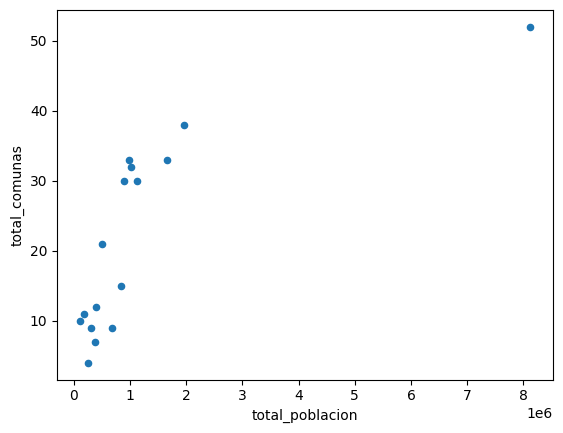

In [79]:
# Un ejemplo de lo que se viene para la siguiente clase
resultado.plot.scatter("total_poblacion", "total_comunas")

# Links interesantes
- [Pandas](https://pandas.pydata.org/docs/user_guide/10min.html) tiene una guía introductoria de 10 minutos
- [W3Schools](https://www.w3schools.com/python/pandas/default.asp) tiene un tutorial de Pandas, incluyendo [algunos ejercicios](https://www.w3schools.com/python/pandas/exercise.asp)